In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
%matplotlib inline
sns.set()

In [2]:
random.seed(42)

In [3]:
data=[]
flatten_data=[]
labels=[]
paths= sorted(list(paths.list_images('dataset/training_set')))
random.shuffle(paths)

for i in paths:
    images= cv2.imread(i)
    images_1= cv2.resize(images,(64,64))
    images= cv2.resize(images,(64,64)).flatten()
    flatten_data.append(images)
    data.append(images_1)
    
    label= i.split(os.path.sep)[-2]
    labels.append(label)

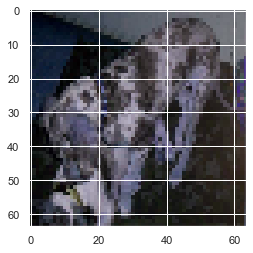

In [4]:
plt.imshow(data[3]);

In [5]:
X_train,X_test,y_train,y_test= train_test_split(flatten_data,
                                                labels,
                                                test_size=0.2,
                                                random_state=42,shuffle=True)

In [6]:
from sklearn.preprocessing import LabelBinarizer

In [7]:
label_bin= LabelBinarizer()

In [8]:
y_train= label_bin.fit_transform(y_train)
y_test= label_bin.transform(y_test)

In [9]:
X_train= np.array(X_train,dtype='float')/255
X_test= np.array(X_test,dtype='float')/255

In [10]:
ann= tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(12288,),activation='relu'),
    tf.keras.layers.Dense(521,activation='relu'),
    tf.keras.layers.Dense(150,activation='sigmoid'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [11]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
epoch= 50
batch_size=32

In [13]:
hist= ann.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),batch_size=batch_size)

Epoch 1/50
100/100 [==============================] - 12s 117ms/step - loss: 0.7985 - accuracy: 0.4959 - val_loss: 0.6959 - val_accuracy: 0.4913
Epoch 2/50
100/100 [==============================] - 10s 97ms/step - loss: 0.6964 - accuracy: 0.4996 - val_loss: 0.6936 - val_accuracy: 0.4913
Epoch 3/50
100/100 [==============================] - 10s 98ms/step - loss: 0.6955 - accuracy: 0.4877 - val_loss: 0.6942 - val_accuracy: 0.5088
Epoch 4/50
100/100 [==============================] - 11s 105ms/step - loss: 0.6959 - accuracy: 0.4957 - val_loss: 0.6975 - val_accuracy: 0.4913
Epoch 5/50
100/100 [==============================] - 10s 96ms/step - loss: 0.6984 - accuracy: 0.5072 - val_loss: 0.6965 - val_accuracy: 0.5088
Epoch 6/50
100/100 [==============================] - 10s 105ms/step - loss: 0.6964 - accuracy: 0.4960 - val_loss: 0.6951 - val_accuracy: 0.4913
Epoch 7/50
100/100 [==============================] - 10s 96ms/step - loss: 0.6944 - accuracy: 0.5039 - val_loss: 0.6930 - val_accura

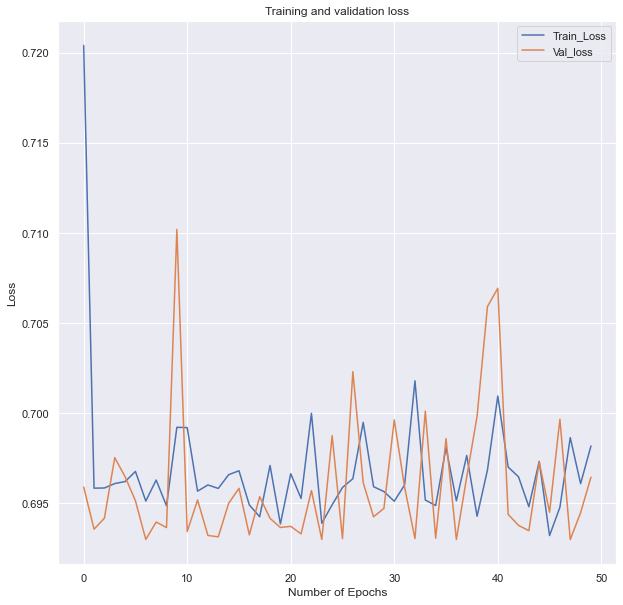

In [14]:
N= np.arange(0,epoch)
plt.figure(figsize=(10,10))
plt.plot(N,hist.history['loss'],label='Train_Loss')
plt.plot(N,hist.history['val_loss'],label='Val_loss')
plt.title('Training and validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

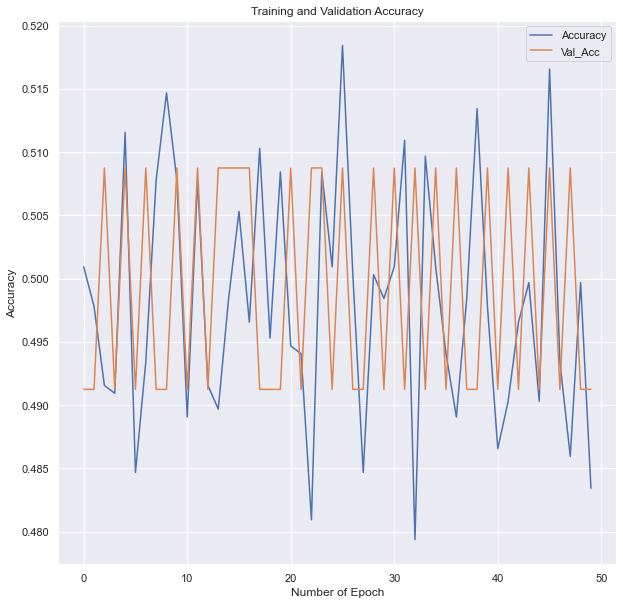

In [15]:
N= np.arange(0,epoch)
plt.figure(figsize=(10,10))
plt.plot(N,hist.history["accuracy"],label='Accuracy')
plt.plot(N,hist.history['val_accuracy'],label='Val_Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend();

In [16]:
prediction= ann.predict(X_test)

In [17]:
print('Confusion_matrix')
print(confusion_matrix(y_test.argmax(axis=1),prediction.argmax(axis=1)))
print('Classification_Report')
print(classification_report(y_test.argmin(axis=1),prediction.argmax(axis=1)))

Confusion_matrix
[[  0 800]
 [  0   0]]
Classification_Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     800.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     800.0
   macro avg       0.00      0.00      0.00     800.0
weighted avg       0.00      0.00      0.00     800.0



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classif